In [108]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Importing the Data 

In [109]:
url =  "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url);

### Data Preprocessing

In [110]:
df.drop(columns=['Unnamed: 0']).sample(7)

,TV,radio,newspaper,sales
71,109.8,14.3,31.7,12.4
161,85.7,35.8,49.3,13.3
165,234.5,3.4,84.8,11.9
151,121.0,8.4,48.7,11.6
109,255.4,26.9,5.5,19.8
18,69.2,20.5,18.3,11.3
36,266.9,43.8,5.0,25.4


In [111]:
#Check the null values 
print(df.isnull().sum())
#Checking for duplicated values 
print(df[df.duplicated()].sum())

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64
Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64


In [112]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


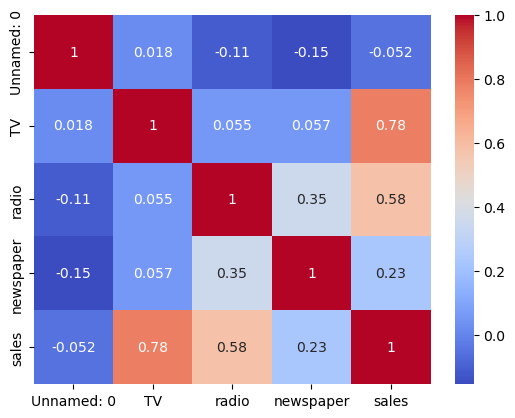

In [184]:
# Show the correlations betweenm data 
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.savefig('Corr.png')
plt.show()

In [114]:
# Preparing data for Training 
X = df[['TV','radio','newspaper']]
Y = df[['sales']]

### Splitting the Data

In [115]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

### Train the model

In [123]:
# Initialize the model 
model = LinearRegression()

# Train the model
model.fit(x_train,y_train)

# Printing the coeffcient and interept
print("Coefficient is : ",model.coef_)
print("Intercept is : ",model.intercept_)

Coefficient is :  [[4.58675073e-02 1.86727198e-01 1.68283553e-04]]
Intercept is :  [2.89105133]


### Evaluate the model

In [124]:
# Predictions
y_pred = model.predict(x_test)

# metrics
mse = mean_squared_error(y_test,y_pred)
r2s = r2_score(y_test,y_pred)

# Printing the metrics
print("Mean Squared Error is ",np.round(mse,3))
print("R2 Score is ",np.round(r2s,3))

Mean Squared Error is  2.4
R2 Score is  0.906


### Visulaize the Predictions

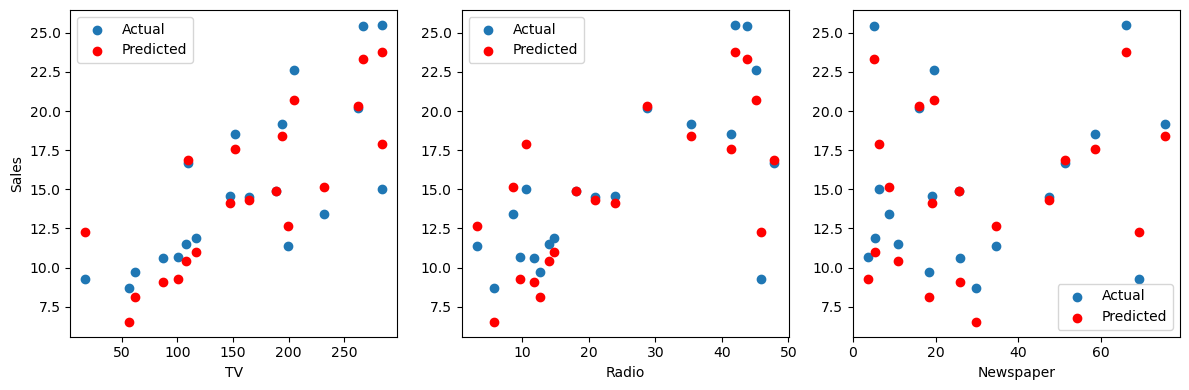

In [183]:
# Set size of figures
plt.figure(figsize=(12,4))


# Plotting TV Actual Sales VS Predicted Sales
plt.subplot(1,3,1)
plt.scatter(x_test['TV'],y_test,label='Actual')
plt.scatter(x_test['TV'],y_pred,color='red',label='Predicted')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()


# Plotting Radio Actual Sales VS Predicted Sales
plt.subplot(1,3,2)
plt.scatter(x_test['radio'],y_test,label='Actual')
plt.scatter(x_test['radio'],y_pred,color='red',label='Predicted')
plt.xlabel('Radio')
plt.legend()


# Plotting Newspaper Actual Sales VS Predicted Sales
plt.subplot(1,3,3)
plt.scatter(x_test['newspaper'],y_test,label='Actual')
plt.scatter(x_test['newspaper'],y_pred,color='red',label='Predicted')
plt.xlabel('Newspaper')
plt.legend()


plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()

###### As we can see, our model is good at predicting the actual sales prices, with the predicted values closely matching the actual ones. The scatter plot illustrates that the predicted and actual sales data are very similar, demonstrating the model's ability to capture trends and patterns in the data. Considering this is a beginner project, it’s a significant achievement to develop a model that performs well in predicting sales based on TV, radio, and newspaper advertising data. The results validate the model's accuracy and the effectiveness of the chosen approach, providing a solid foundation for future improvements.